In [99]:
from astropy import units as u
from astropy import constants as const
import numpy as np
from matplotlib import pyplot as plt

In [100]:
def magnification(u):
    top = u**2 + 2
    bottom = u * np.sqrt(u**2 + 4)
    return top / bottom

In [101]:
def reee(ein, dol):
    return ein.to(u.radian) * dol

In [102]:
def source_lens_sep(t, umin, v, re):
    test = (v.to(u.m / u.second)*(t.to(u.second))/re.to(u.m*u.rad))**2
    return np.sqrt(umin**2 + test.value)

In [105]:
t = np.linspace(-1000, 1000, num=500) * u.day
umin = np.linspace(0.1,1,num=5)
v = 200 * u.km * u.s**(-1)
ein = 8 * u.milliarcsecond
dol = 2 * u.kpc
re = reee(ein, dol)

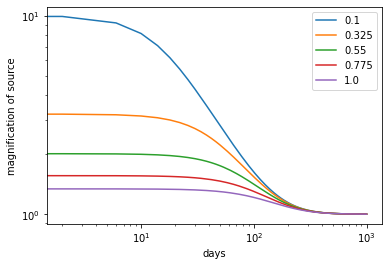

In [106]:
for un in umin:
    sep = source_lens_sep(t, un, v, re)
    A = magnification(sep)
    plt.plot(t, A, label=un)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('days')
plt.ylabel('magnification of source')
plt.legend()
plt.show()

$\theta_E = \sqrt{\frac{4 G M}{c^2}\frac{D_{LS}}{D_L D_S}}$

$M = \frac{\theta_E^2 D_L D_S c^2}{4 G D_{LS}}$ 

In [85]:
def M_BH(ein, dl, ds):
    dls = ds - dl
    top = ein.to(u.rad)**2 * dl.to(u.m) * ds.to(u.m) * const.c**2
    bottom = 4 * const.G * dls.to(u.m)
    return (top/bottom).to(u.M_sun, equivalencies=u.dimensionless_angles())

In [86]:
M_BH(4 * u.milliarcsecond, 2 * u.kpc, 6*u.kpc)

<Quantity 5.89401581 solMass>

In [87]:
Mag1 = 16.4
Mag2 = 13.2
diff = Mag2 - Mag1
A = 10**(diff/-2.5)
A

19.054607179632463

$A = \frac{u^2 + 2}{u \sqrt{}u^2 + 4}$

In [95]:
from sympy import symbols, solve

u = symbols('x')
expr = (u**2 + 2) / (u * (u**2+4)**(1/2)) - 19.05
sol = solve(expr)

In [97]:
sol[0]

0.0525477783825459